# Exploratory Data Analysis of Test Data (OPENRNDR)

### Importing Libraries

In [2]:
import json
import os
import re
from pathlib import Path
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from wordcloud import WordCloud
from textblob import TextBlob
from urllib.parse import urlparse

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\Imaji
[nltk_data]     Kasih\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Imaji
[nltk_data]     Kasih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Imaji
[nltk_data]     Kasih\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Imaji
[nltk_data]     Kasih\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Loading the data

In [72]:
# path to the directory where JSON files ae
post_dir = Path('./archive/posts')

# list to store data
data = []

In [73]:
# iterate through all JSON files in the directory
for json_file in post_dir.glob('**/*.json'):
    with open(json_file, 'r') as f:
        post_data = json.load(f)
        data.append(post_data)

In [74]:
df = pd.DataFrame(data)

In [75]:
# dropping (possible) irrelevant columns
df = df.drop(['avatar_template', 
'yours', 
'topic_html_title', 
'display_username', 
'flair_name', 
'flair_url', 
'flair_bg_color', 
'flair_color', 
'flair_group_id',
'can_edit',
'can_delete',
'can_recover',
'can_see_hidden_post',
'can_wiki',
'bookmarked',
'moderator',
'admin',
'staff',
'hidden',
'user_deleted',
'edit_reason',
'can_view_edit_history',
'wiki',
'current_user_reaction',
'current_user_used_main_reaction',
'via_email',
'primary_group_name'], axis=1)

In [76]:
df.columns

Index(['id', 'name', 'username', 'created_at', 'cooked', 'post_number',
       'post_type', 'updated_at', 'reply_count', 'reply_to_post_number',
       'quote_count', 'incoming_link_count', 'reads', 'readers_count', 'score',
       'topic_id', 'topic_slug', 'topic_title', 'category_id', 'version',
       'user_title', 'raw', 'actions_summary', 'user_id', 'trust_level',
       'deleted_at', 'reactions', 'reaction_users_count', 'can_accept_answer',
       'can_unaccept_answer', 'accepted_answer', 'topic_accepted_answer',
       'reply_to_user', 'polls'],
      dtype='object')

## Preprocessing and EDA

### Preliminary statistics

In [77]:
# preliminary statistics
df.describe()

,id,post_number,post_type,reply_count,reply_to_post_number,quote_count,incoming_link_count,reads,readers_count,score,topic_id,category_id,version,user_id,trust_level,reaction_users_count
count,1255.000000,1255.000000,1255.0,1255.000000,507.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,1048.927490,18.075697,1.0,0.407968,17.893491,0.015936,22.896414,14.764143,13.764143,141.082869,306.857371,8.282072,1.367331,40.835857,2.784064,0.821514
std,583.635644,38.512677,0.0,0.542544,36.674733,0.125279,139.464390,10.122936,10.122936,696.761002,208.809627,3.801719,0.843240,49.946049,1.403596,1.248290
min,1.000000,1.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.200000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,507.500000,2.000000,1.0,0.000000,3.000000,0.000000,0.000000,8.000000,7.000000,7.400000,99.000000,7.000000,1.000000,6.000000,1.000000,0.000000
50%,1086.000000,4.000000,1.0,0.000000,5.000000,0.000000,1.000000,12.000000,11.000000,22.400000,303.000000,8.000000,1.000000,6.000000,4.000000,0.000000
75%,1565.500000,9.000000,1.0,1.000000,9.500000,0.000000,4.000000,18.000000,17.000000,68.800000,503.000000,11.000000,1.000000,87.000000,4.000000,1.000000
max,2015.000000,189.000000,1.0,3.000000,178.000000,1.000000,2747.000000,74.000000,73.000000,13596.600000,677.000000,18.000000,11.000000,176.000000,4.000000,8.000000


In [78]:
# convert 'created_at' and 'updated_at' to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at']) 

In [79]:
# create a new feature for post length (in terms of word count)
df['post_length'] = df['raw'].apply(lambda x: len(x.split()))

### Visualizing

<AxesSubplot:title={'center':'Number of posts over time'}, xlabel='created_at'>

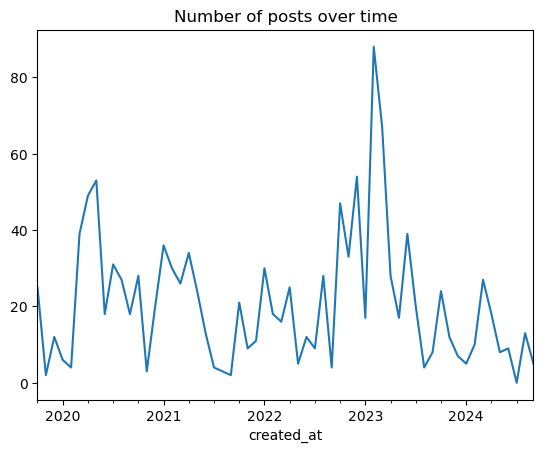

In [80]:
# time-series analysis: post activity over time
df.set_index('created_at').resample('M').size().plot(title='Number of posts over time')

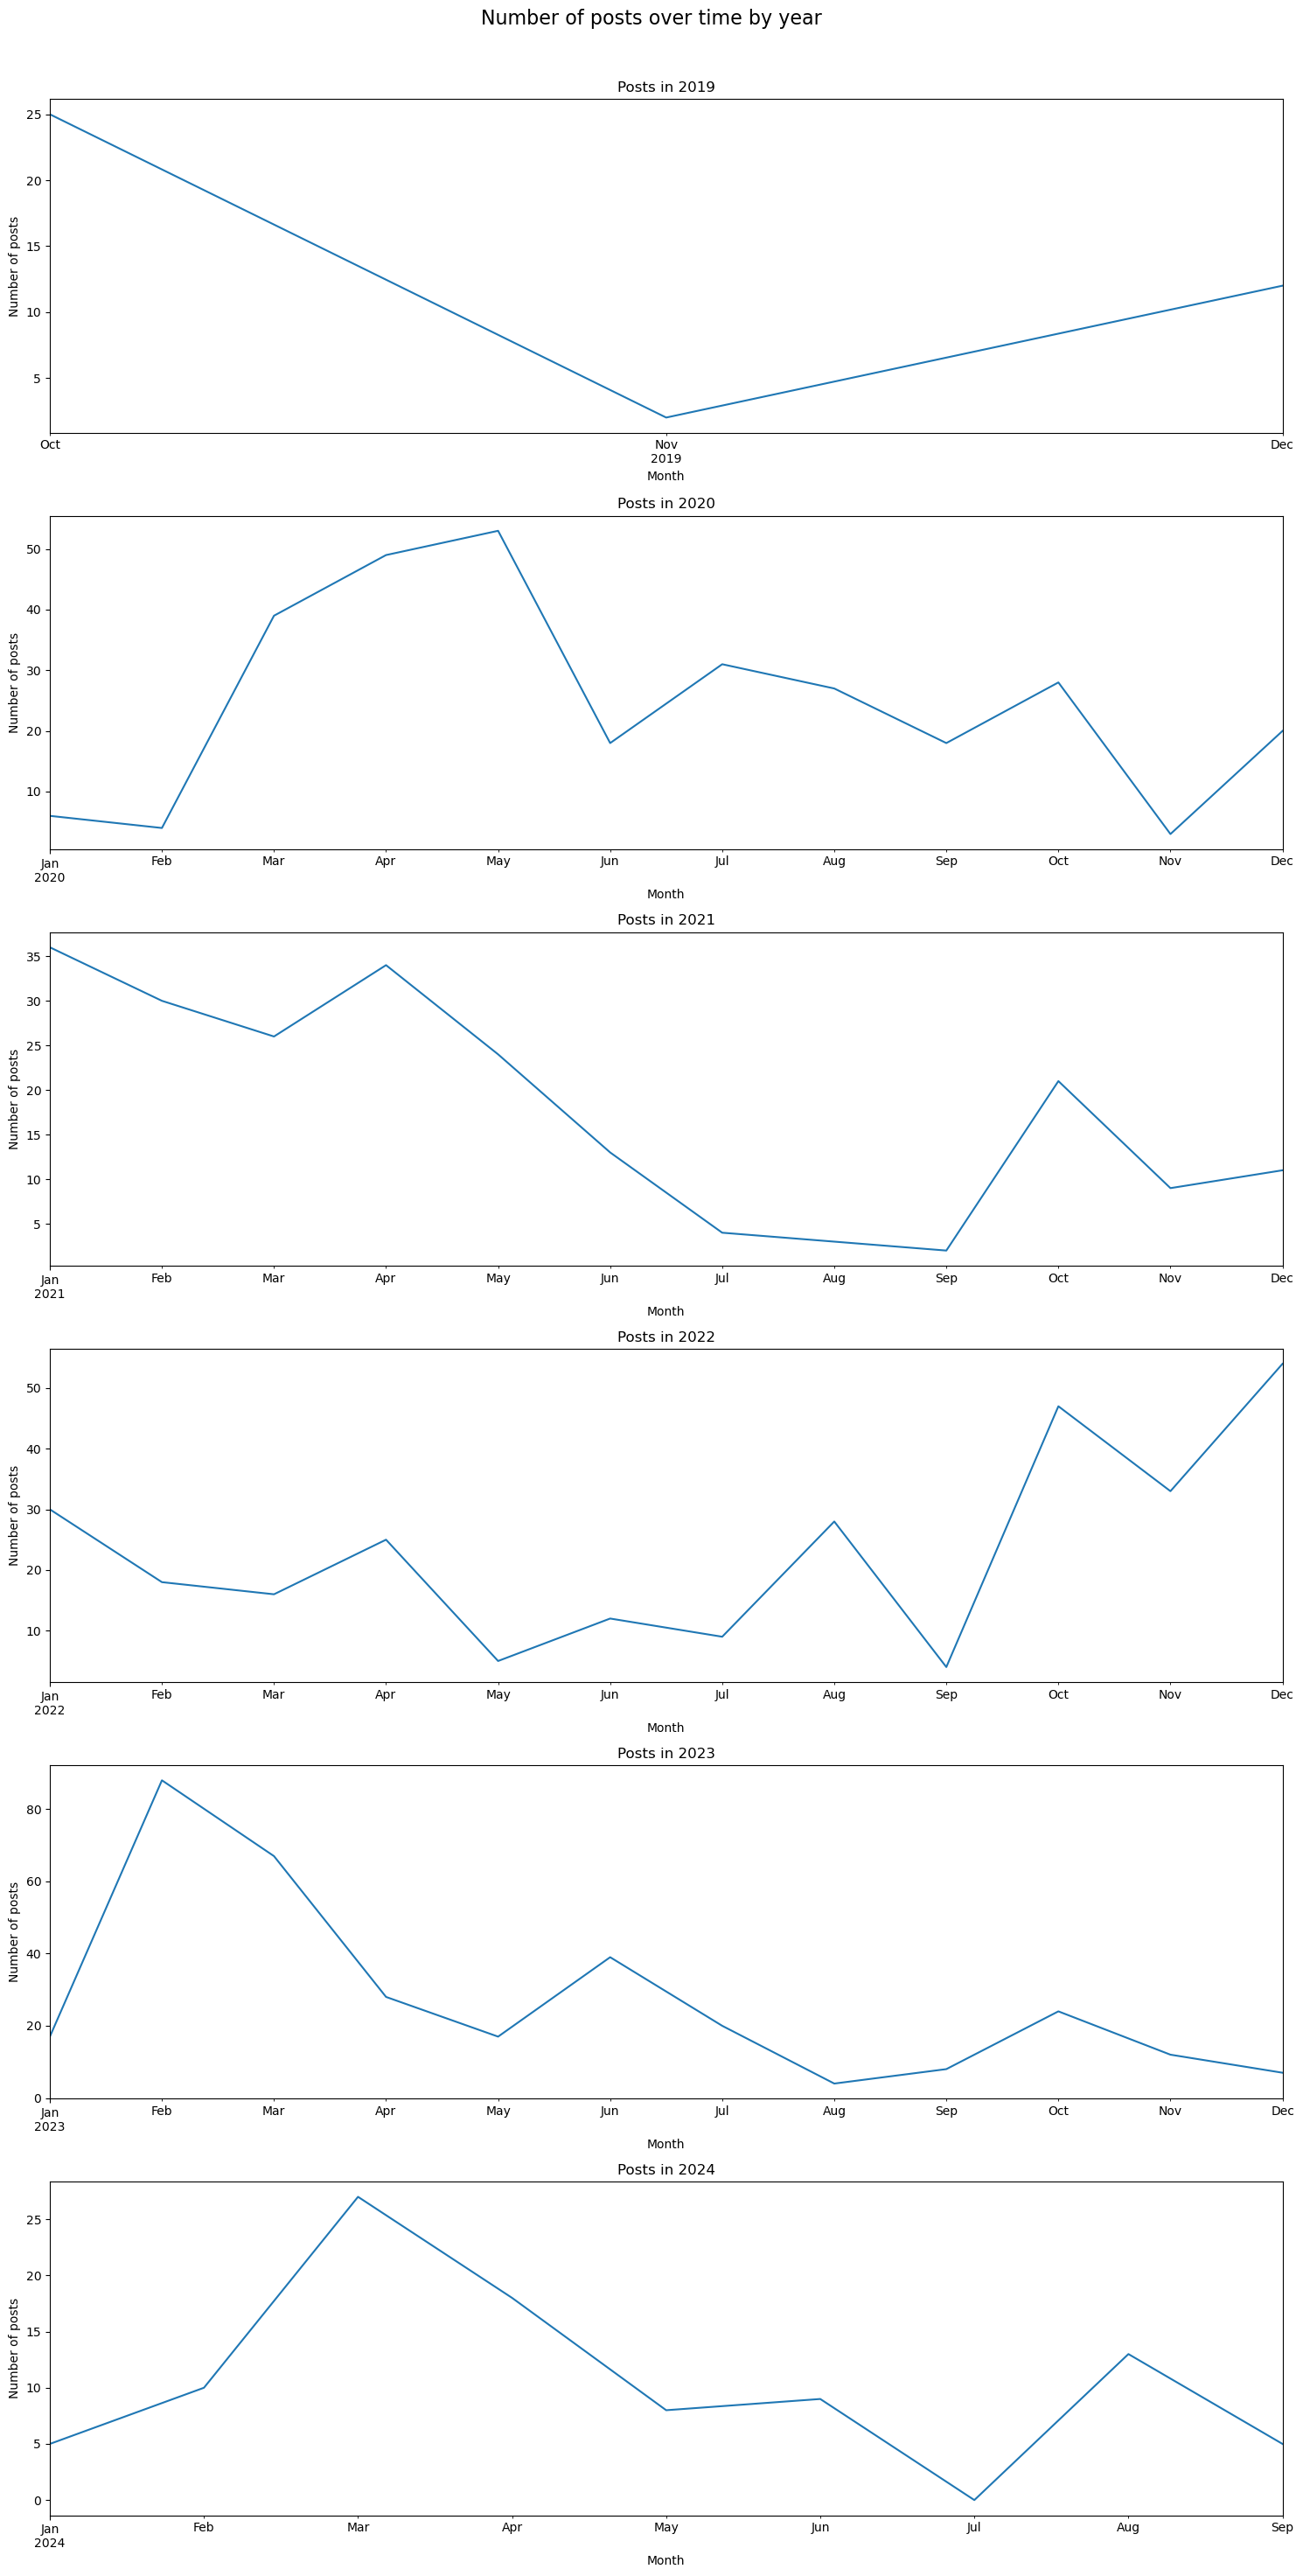

In [96]:
df_copy = df.copy()
df_copy.set_index('created_at', inplace=True)

# get the range of years
years = df_copy.index.year.unique()

# create subplots
fig, axes = plt.subplots(nrows=len(years), ncols=1, figsize=(15, 5 * len(years)))
fig.suptitle('Number of posts over time by year', fontsize=16)

# plot each year
for i, year in enumerate(years):
    ax = axes[i]
    df_copy[df_copy.index.year == year].resample('M').size().plot(ax=ax, title=f'Posts in {year}', legend=False)
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of posts')

plt.tight_layout(rect=[0, 0, 1, 0.97]) # adjust to fit suptitle
plt.show()

<AxesSubplot:title={'center':'Top 10 most active users'}>

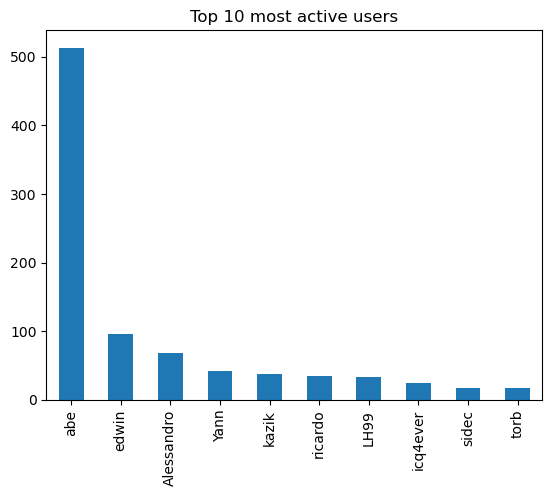

In [81]:
# top 10 most active users
df['username'].value_counts().head(10).plot(kind='bar', title='Top 10 most active users')

<AxesSubplot:title={'center':'Post length vs reads'}, xlabel='post_length', ylabel='reads'>

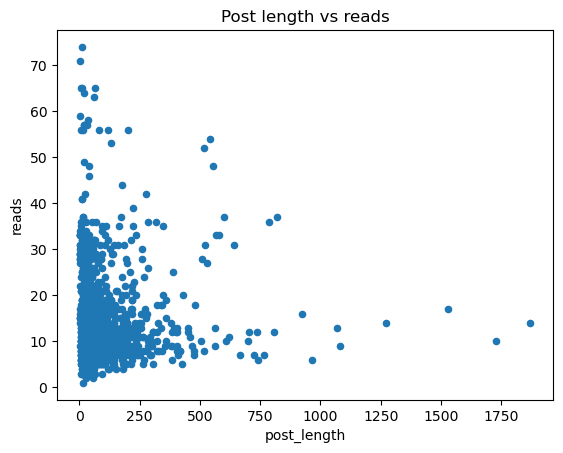

In [82]:
# relationship between post length and engagement
df.plot.scatter(x='post_length', y='reads', title='Post length vs reads')

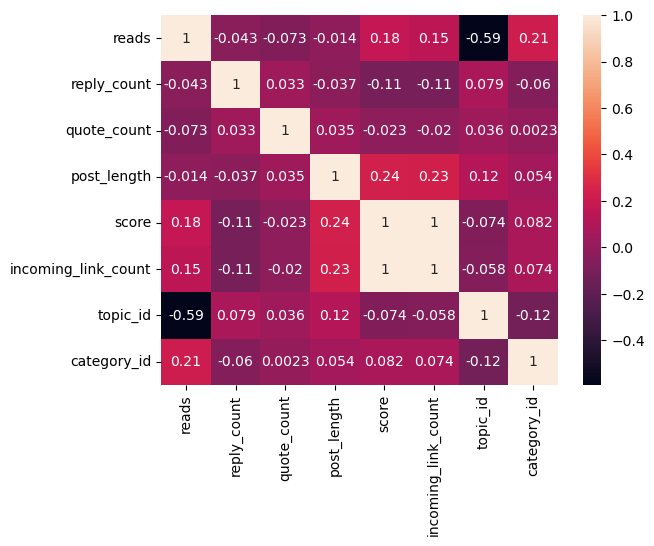

In [83]:
# Correlation matrix to explore relationships between variables
sns.heatmap(df[['reads', 'reply_count', 'quote_count', 'post_length', 'score', 'incoming_link_count', 'topic_id', 'category_id']].corr(), annot=True)
plt.show()

In [84]:
df.columns

Index(['id', 'name', 'username', 'created_at', 'cooked', 'post_number',
       'post_type', 'updated_at', 'reply_count', 'reply_to_post_number',
       'quote_count', 'incoming_link_count', 'reads', 'readers_count', 'score',
       'topic_id', 'topic_slug', 'topic_title', 'category_id', 'version',
       'user_title', 'raw', 'actions_summary', 'user_id', 'trust_level',
       'deleted_at', 'reactions', 'reaction_users_count', 'can_accept_answer',
       'can_unaccept_answer', 'accepted_answer', 'topic_accepted_answer',
       'reply_to_user', 'polls', 'post_length'],
      dtype='object')

In [85]:
# number of unique id(s) for topics, categories, and users
df['topic_id'].nunique() #232
df['category_id'].nunique() #14
df['user_id'].nunique() #91

91

### Groupping by category and topic

In [86]:
# group posts by category_id and topic_id
grouped_posts = defaultdict(lambda: defaultdict(list))
for post in data:
    grouped_posts[post['category_id']][post['topic_id']].append(post)

In [87]:
# print the number of posts per topic within each category
for category_id, topics in grouped_posts.items():
    print(f'Category ID {category_id}:')
    for topic_id, posts in topics.items():
        print(f' Topic ID {topic_id}: {len(posts)} posts')

Category ID 2:
 Topic ID 1: 1 posts
 Topic ID 13: 7 posts
 Topic ID 14: 2 posts
 Topic ID 34: 4 posts
 Topic ID 54: 2 posts
Category ID 1:
 Topic ID 7: 1 posts
 Topic ID 132: 3 posts
 Topic ID 185: 2 posts
 Topic ID 211: 6 posts
 Topic ID 226: 1 posts
 Topic ID 259: 3 posts
 Topic ID 272: 1 posts
 Topic ID 338: 2 posts
 Topic ID 356: 5 posts
 Topic ID 358: 11 posts
 Topic ID 439: 4 posts
 Topic ID 441: 3 posts
 Topic ID 445: 4 posts
 Topic ID 450: 4 posts
 Topic ID 452: 7 posts
 Topic ID 459: 6 posts
 Topic ID 471: 6 posts
 Topic ID 496: 18 posts
 Topic ID 504: 12 posts
 Topic ID 529: 5 posts
 Topic ID 556: 3 posts
 Topic ID 613: 11 posts
 Topic ID 652: 4 posts
 Topic ID 655: 4 posts
 Topic ID 675: 6 posts
Category ID 5:
 Topic ID 15: 1 posts
 Topic ID 206: 3 posts
 Topic ID 214: 6 posts
 Topic ID 235: 3 posts
 Topic ID 266: 3 posts
 Topic ID 280: 1 posts
 Topic ID 303: 5 posts
 Topic ID 352: 5 posts
 Topic ID 367: 2 posts
 Topic ID 374: 1 posts
 Topic ID 386: 5 posts
 Topic ID 485: 4 

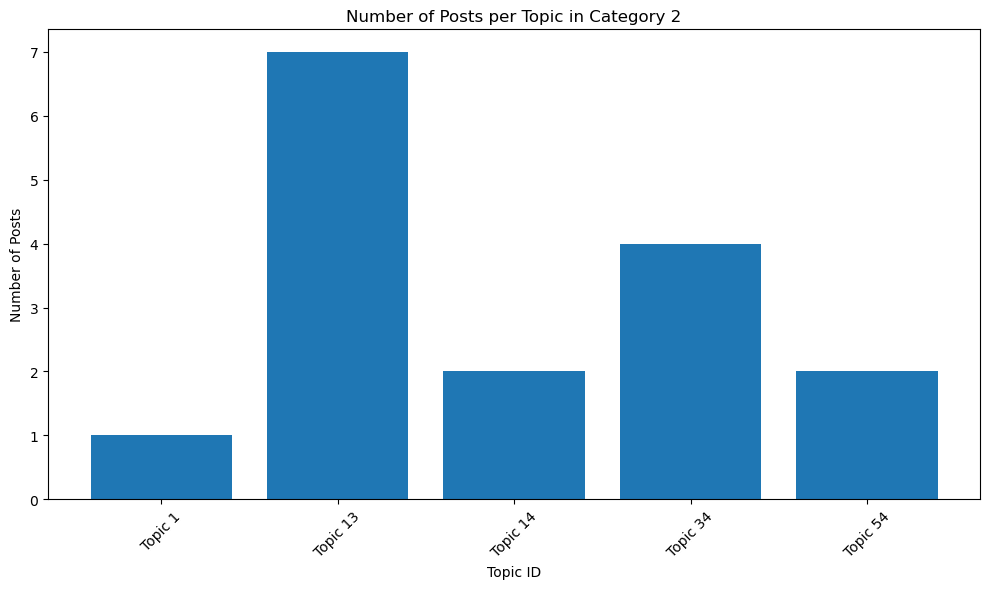

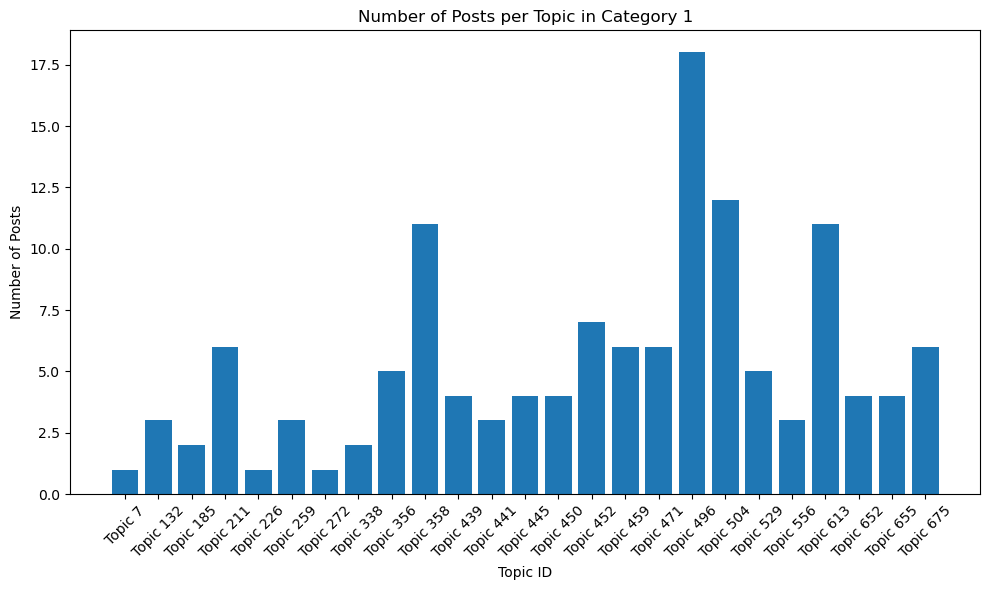

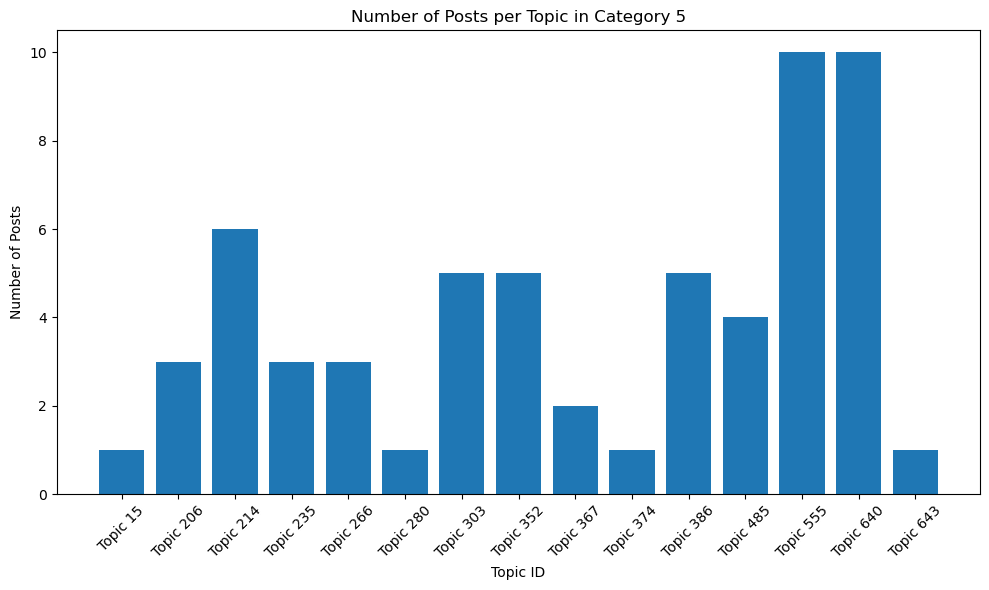

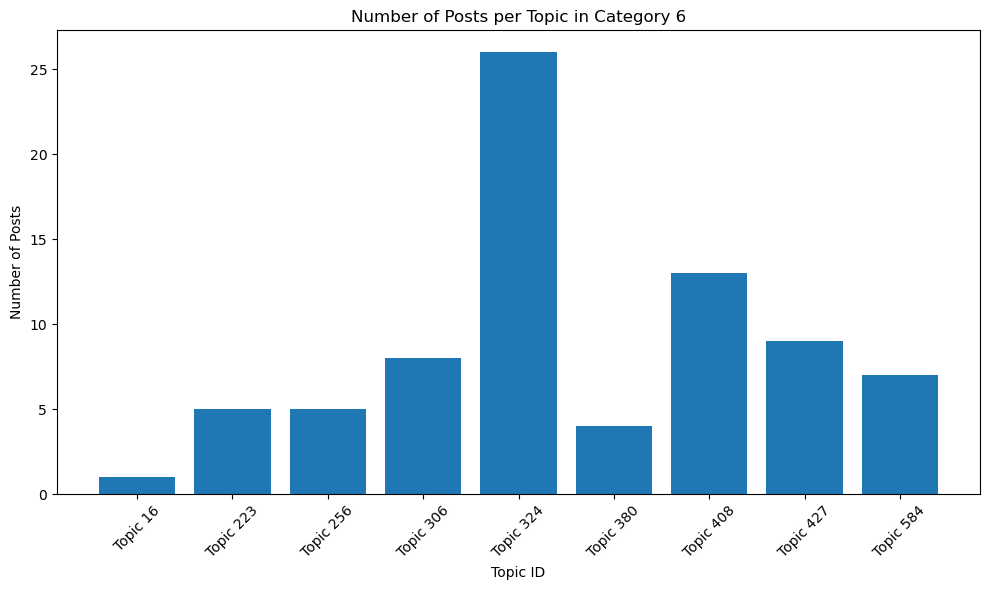

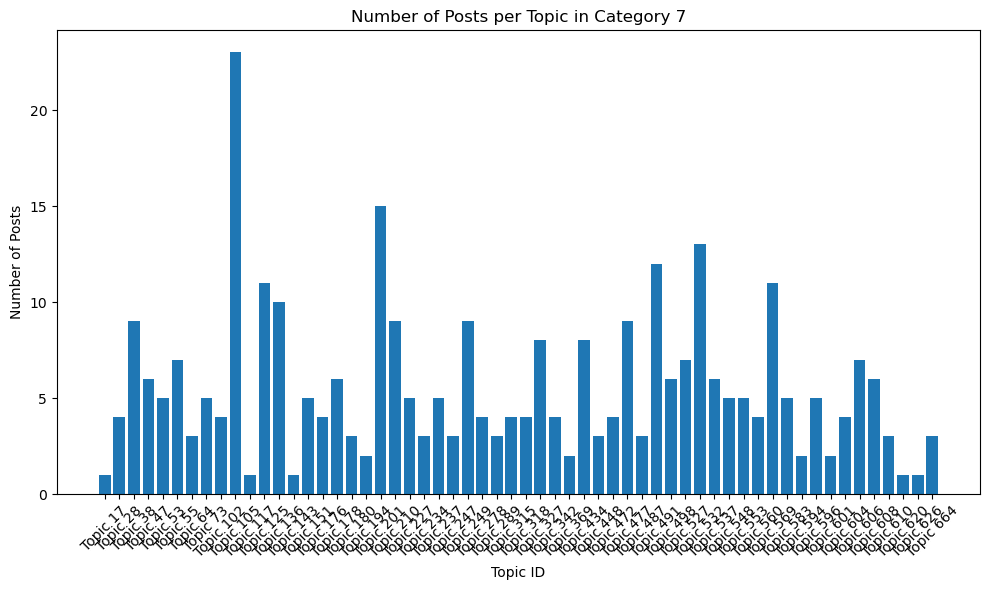

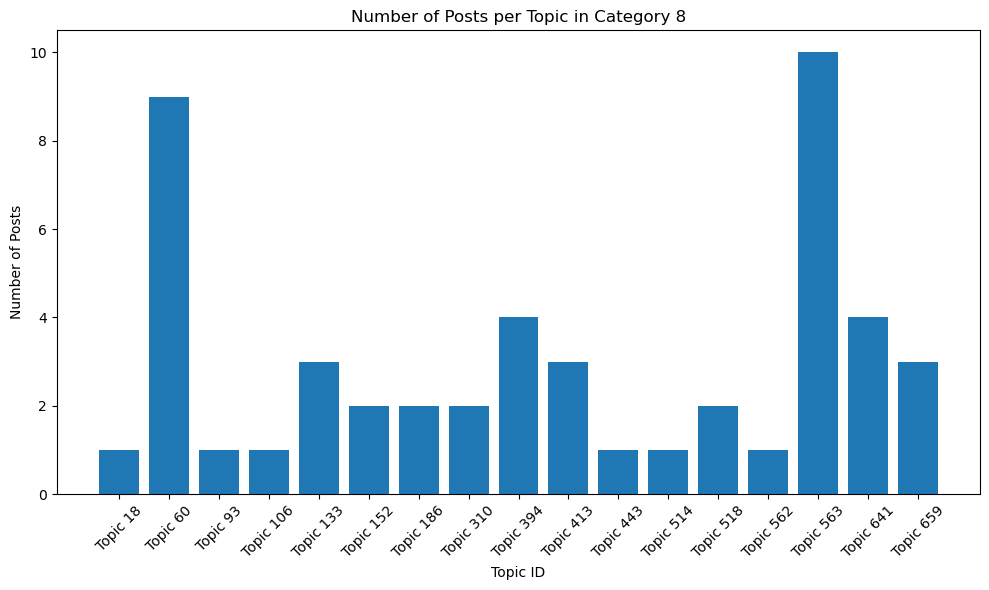

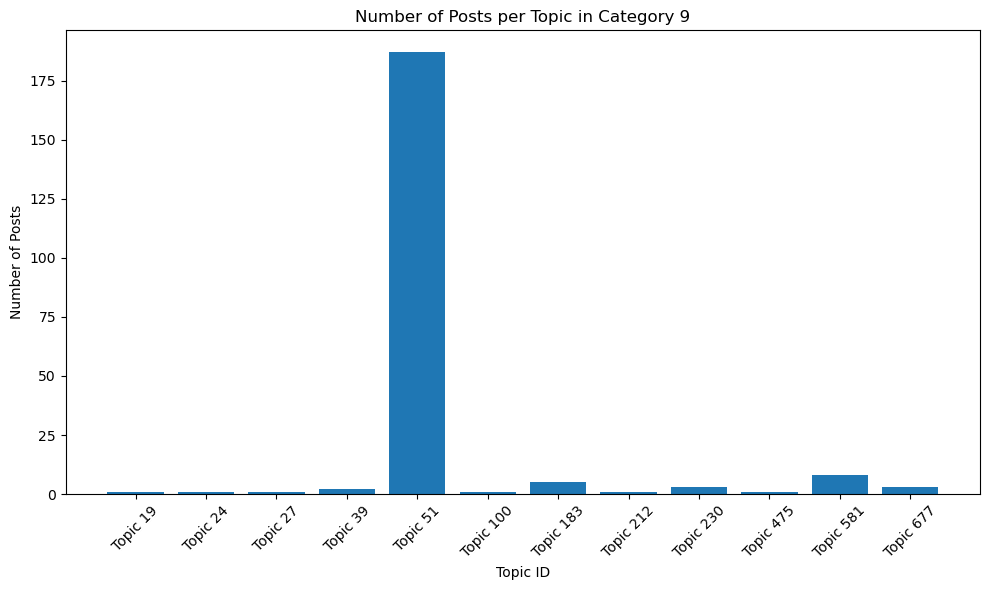

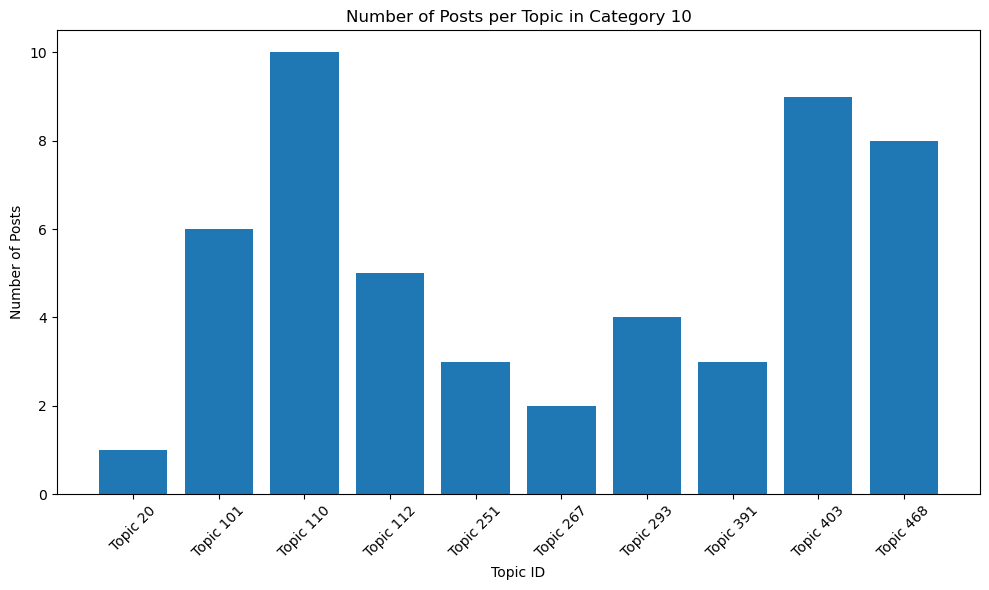

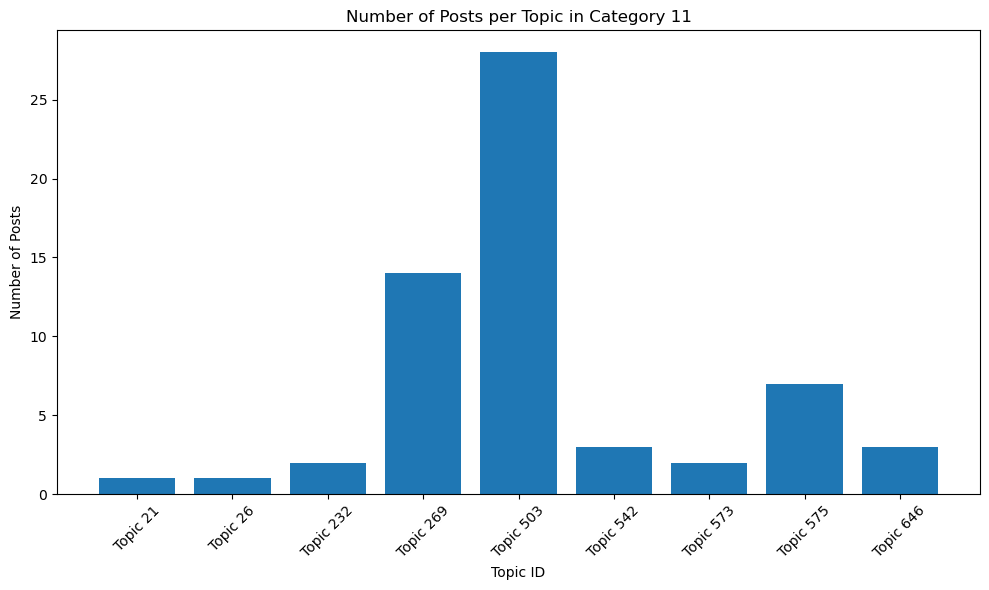

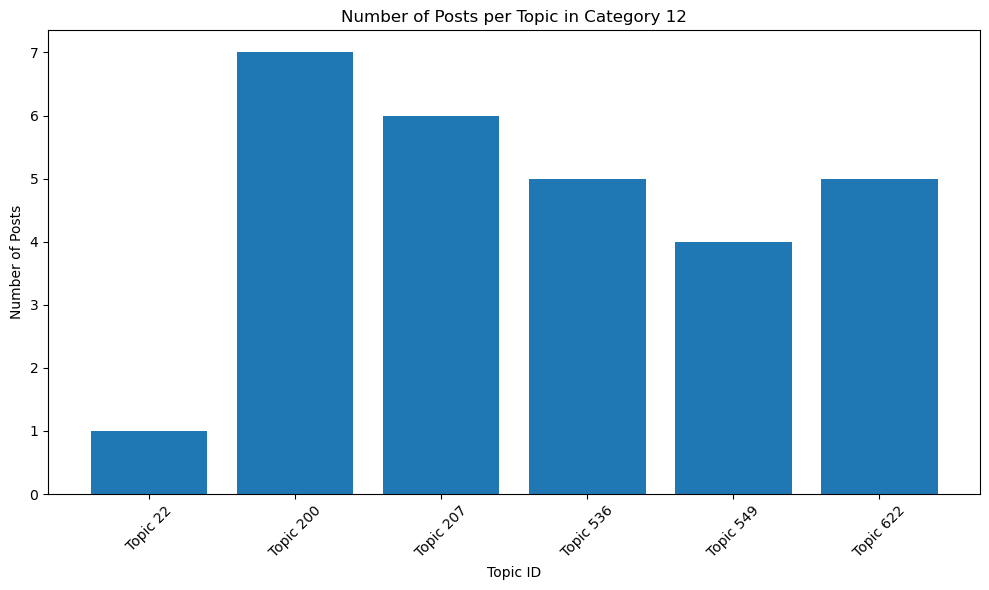

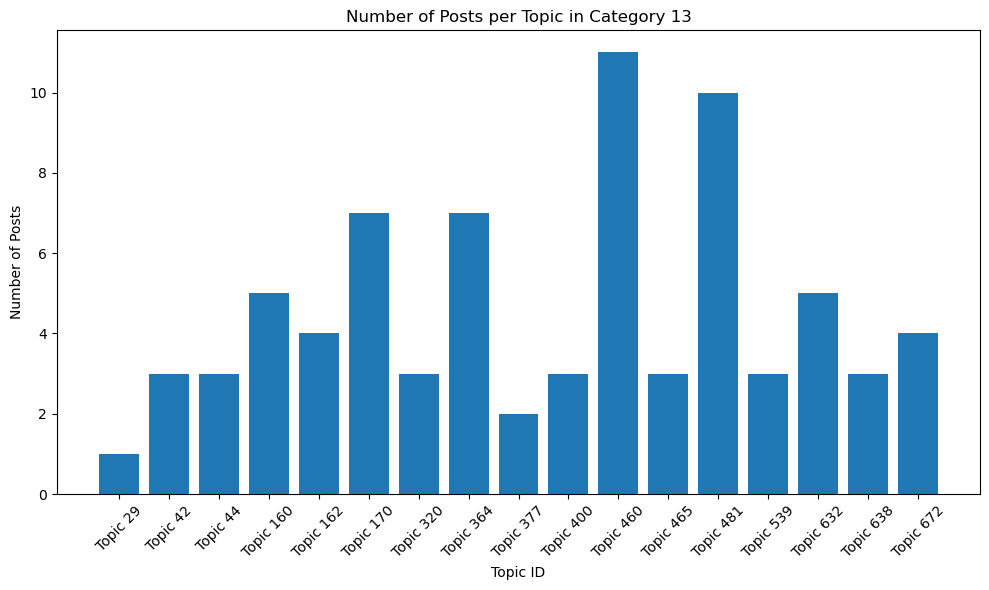

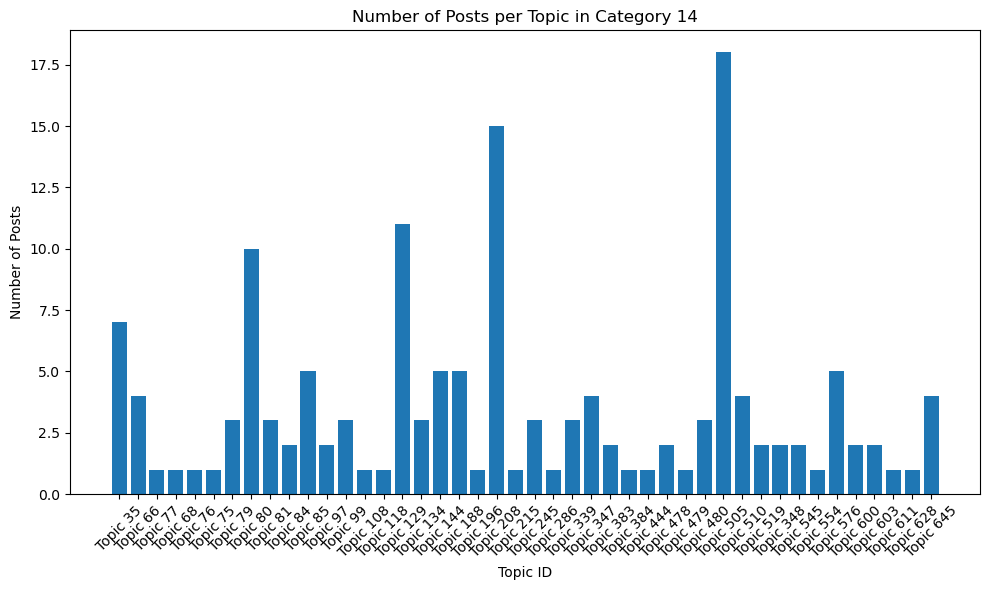

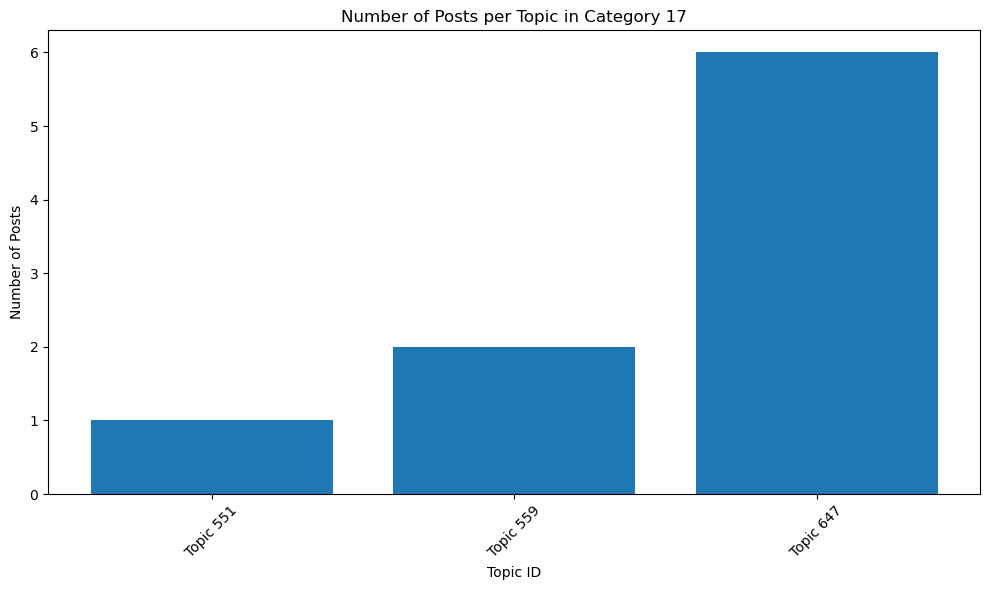

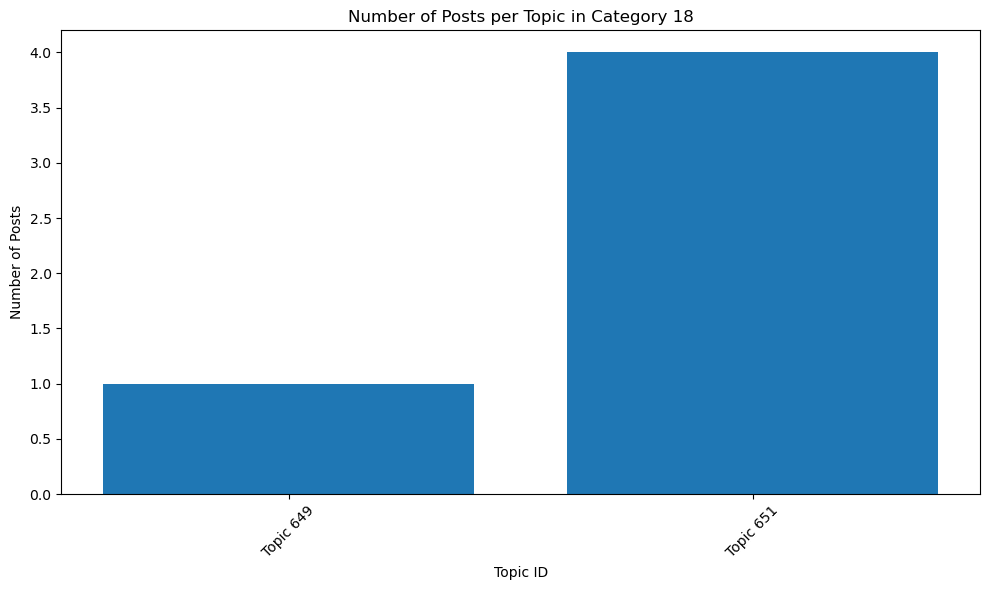

In [88]:
category_ids = []

for category_id, topics in grouped_posts.items():
    topic_ids = []
    post_counts = []

    for topic_id, posts in topics.items():
        topic_ids.append(topic_id)
        post_counts.append(len(posts))

    # bar chart for the current category
    plt.figure(figsize=(10, 6))
    bars = [f"Topic {t}" for t in topic_ids]
    plt.bar(bars, post_counts)
    plt.xlabel('Topic ID')
    plt.ylabel('Number of Posts')
    plt.title(f'Number of Posts per Topic in Category {category_id}')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.tight_layout()
    plt.show()

### Text (raw) processing

In [91]:
# initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# text preprocessing function
def preprocess_text(text):
    # convert to lowercase
    text = text.lower()
    
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # tokenize
    words = word_tokenize(text)
    
    # remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    
    # lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(lemmatized_words)

In [92]:
# apply text preprocessing to the 'raw' column
df['cleaned_text'] = df['raw'].apply(preprocess_text)

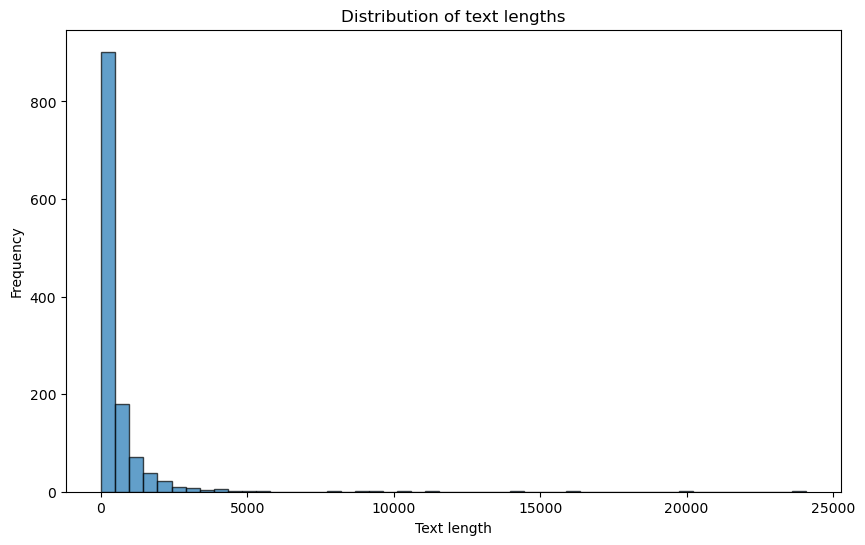

In [100]:
# text length distribution (histogram)
df['text_length'] = df['cleaned_text'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.title('Distribution of text lengths')
plt.show()

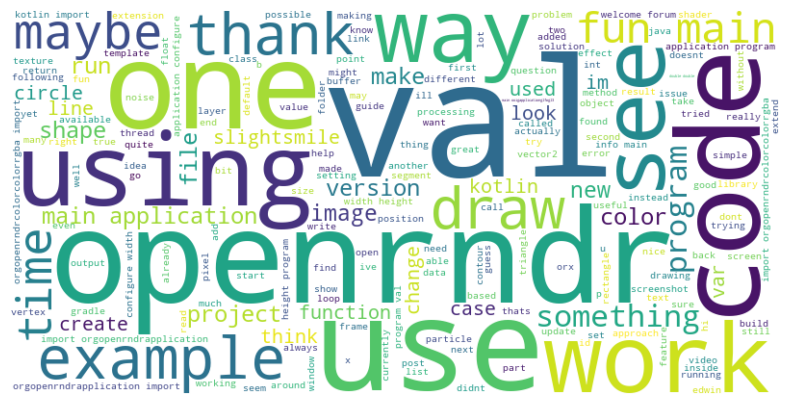

In [103]:
# generate word cloud
text = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

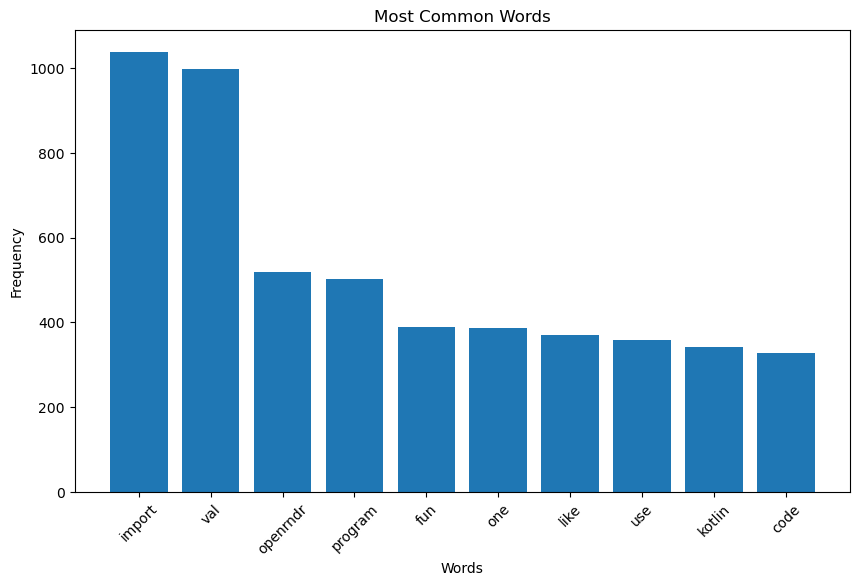

In [104]:
# count word frequencies
words = ' '.join(df['cleaned_text']).split()
word_freq = Counter(words)
most_common_words = word_freq.most_common(10)

# prepare data for plotting
words, counts = zip(*most_common_words)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [93]:
# storing cleaned data
'''
# Save the preprocessed data to a CSV file for further analysis
df.to_csv('cleaned_discourse_data.csv', index=False)
'''

"\n# Save the preprocessed data to a CSV file for further analysis\ndf.to_csv('cleaned_discourse_data.csv', index=False)\n"

### Sentiment Analysis

In [123]:
df['sentiment'] = df['cleaned_text'].apply(lambda text: TextBlob(text).sentiment.polarity)

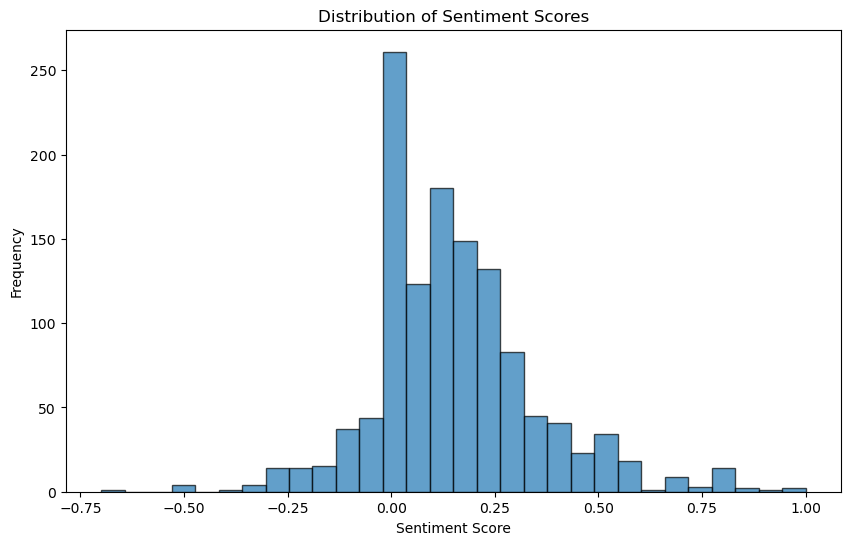

In [124]:
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

### Engagement Metrics

In [153]:
# Function to calculate total reaction count
def get_reaction_count(reactions):
    if isinstance(reactions, list):
        return sum([reaction.get('count', 0) for reaction in reactions])
    return 0  # Return 0 if the reactions list is empty or invalid

# Apply the function to the 'reactions' column
df['reaction_count'] = df['reactions'].apply(get_reaction_count)

# Check if the column now has numeric data
print(df[['reactions', 'reaction_count']].head())

                                        reactions  reaction_count
0                                              []               0
1                                              []               0
2                                              []               0
3                                              []               0
4  [{'id': 'heart', 'type': 'emoji', 'count': 1}]               1


In [155]:
# Define engagement score with customizable weights
df['engagement_score'] = (0.4 * df['reply_count']) + (0.3 * df['reads']) + (0.3 * df['reaction_count'])

In [156]:
# Group by topic and aggregate engagement metrics
popular_topics = df.groupby('topic_id').agg({
    'reactions': 'sum',
    'reply_count': 'sum',
    'reads': 'sum',
    'engagement_score': 'sum'
}).sort_values(by='engagement_score', ascending=False).reset_index()

# Display top 5 most popular topics
print(popular_topics.head())

   topic_id                                          reactions  reply_count  \
0        51  [{'id': 'heart', 'type': 'emoji', 'count': 8},...           70   
1       324  [{'id': 'heart', 'type': 'emoji', 'count': 1},...           16   
2        80  [{'id': 'heart', 'type': 'emoji', 'count': 3},...            5   
3       105  [{'id': 'heart', 'type': 'emoji', 'count': 1},...           12   
4       136  [{'id': 'heart', 'type': 'emoji', 'count': 2},...            4   

   reads  engagement_score  
0   5444            1785.7  
1    445             141.7  
2    344             106.7  
3    330             105.3  
4    283              88.3  


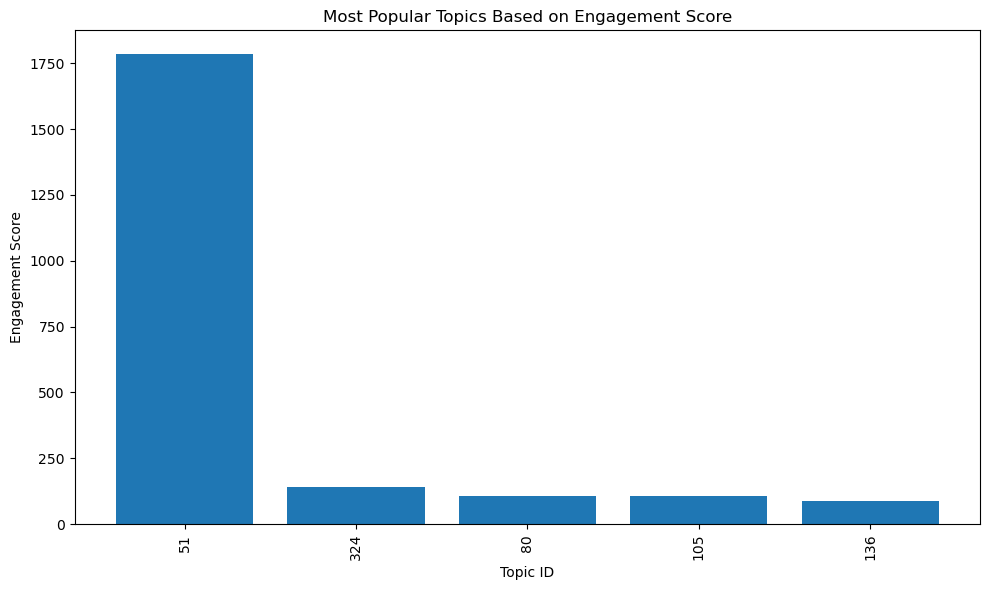

In [159]:
# Visualize the most popular topics
plt.figure(figsize=(10, 6))
plt.bar(popular_topics['topic_id'].head().astype(str), popular_topics['engagement_score'].head())
plt.xlabel('Topic ID')
plt.ylabel('Engagement Score')
plt.title('Most Popular Topics Based on Engagement Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [160]:
# Sort posts by their individual engagement score
popular_posts = df.sort_values(by='engagement_score', ascending=False)

# Display top 5 most popular posts
print(popular_posts[['id', 'topic_id', 'reactions', 'reply_count', 'reads', 'engagement_score']].head())

     id  topic_id                                       reactions  \
50  104        51  [{'id': 'heart', 'type': 'emoji', 'count': 8}]   
49  103        51                                              []   
53  107        51  [{'id': 'heart', 'type': 'emoji', 'count': 5}]   
54  108        51  [{'id': 'heart', 'type': 'emoji', 'count': 5}]   
64  119        51  [{'id': 'heart', 'type': 'emoji', 'count': 3}]   

    reply_count  reads  engagement_score  
50            1     71              24.1  
49            1     74              22.6  
53            0     65              21.0  
54            0     65              21.0  
64            1     63              20.2  


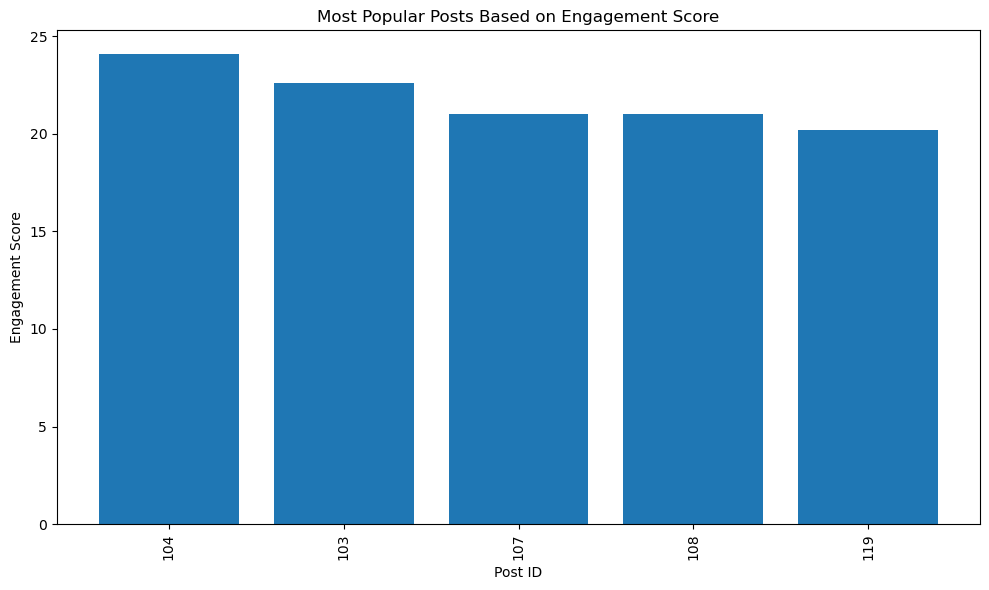

In [161]:
# Visualize the top posts
plt.figure(figsize=(10, 6))
plt.bar(popular_posts['id'].astype(str).head(), popular_posts['engagement_score'].head())
plt.xlabel('Post ID')
plt.ylabel('Engagement Score')
plt.title('Most Popular Posts Based on Engagement Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Cross-Platform Insights

In [163]:
# function to extract URLs from text
def extract_urls(text):
    return re.findall(r'(https?://[^\s]+)', text)

In [164]:
# apply the function to extract URLs in the column
df['urls'] = df['raw'].apply(extract_urls)

In [171]:
def extract_domain(urls):
    domains = [urlparse(url).netloc for url in urls]
    return domains

In [172]:
# apply function to extract domains
df['url_domains'] = df['urls'].apply(extract_domain)

In [175]:
# explode the 'domains' column to create one row per domain
df_exp_dom = df.explode('url_domains')

# count the occurrences of each domain
domain_counts = df_exp_dom['url_domains'].value_counts()

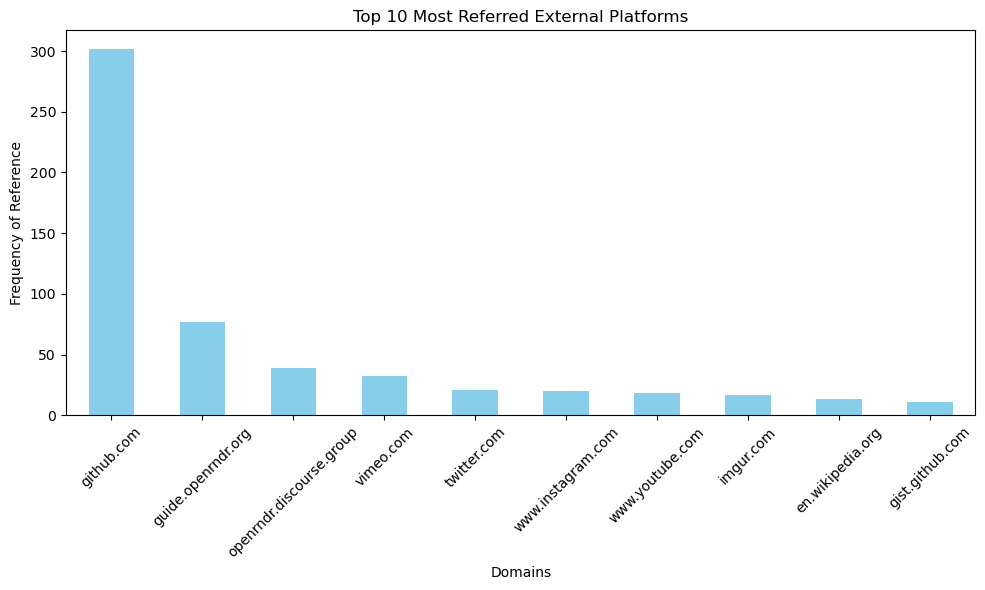

In [177]:
# get top 10 most referred domains
top_10_domains = domain_counts.head(10)

# plot the results
plt.figure(figsize=(10, 6))
top_10_domains.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Referred External Platforms')
plt.xlabel('Domains')
plt.ylabel('Frequency of Reference')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 